In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the ASHRAE CSV file
file_path = "ashrae_db2.01.csv"
dataset = pd.read_csv(file_path)

C:\Users\sakif\AppData\Local\Temp\ipykernel_21364\1567558690.py:3: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file_path)


In [3]:
# Dataset shape
print("Dataset shape:", dataset.shape)

Dataset shape: (107583, 70)


In [4]:
# Column data types
print("\nColumn Data Types:\n", dataset.dtypes)
# Export column data types along with name and range to a CSV file
column_info = dataset.dtypes.reset_index()
column_info.columns = ["Column Name", "Data Type"]
column_info["Range"] = dataset.apply(
    lambda col: f"{col.min()} - {col.max()}" if col.dtype != "object" else "N/A"
)
column_info.to_csv("column_data_types.csv", index=False)


Column Data Types:
 Publication (Citation)                  object
Data contributor                        object
Year                                   float64
Season                                  object
Koppen climate classification           object
                                        ...   
Door                                   float64
Heater                                 float64
Outdoor monthly air temperature (C)    float64
Outdoor monthly air temperature (F)    float64
Database                                object
Length: 70, dtype: object


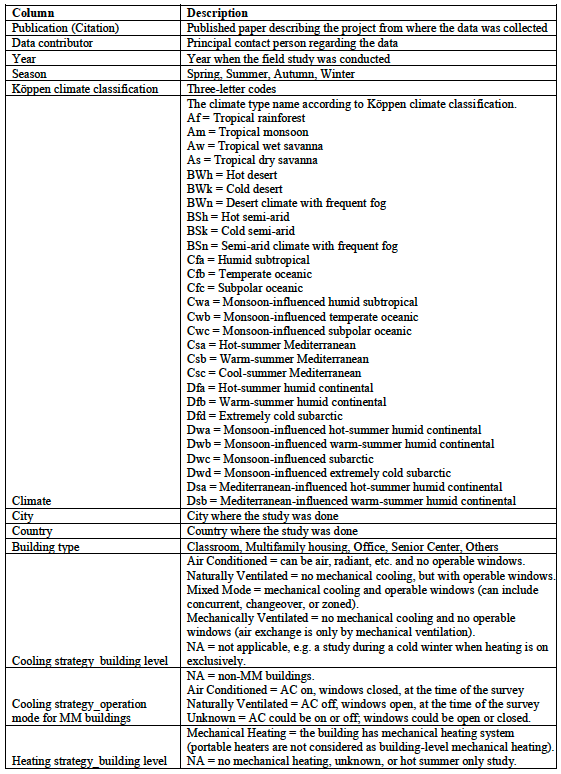
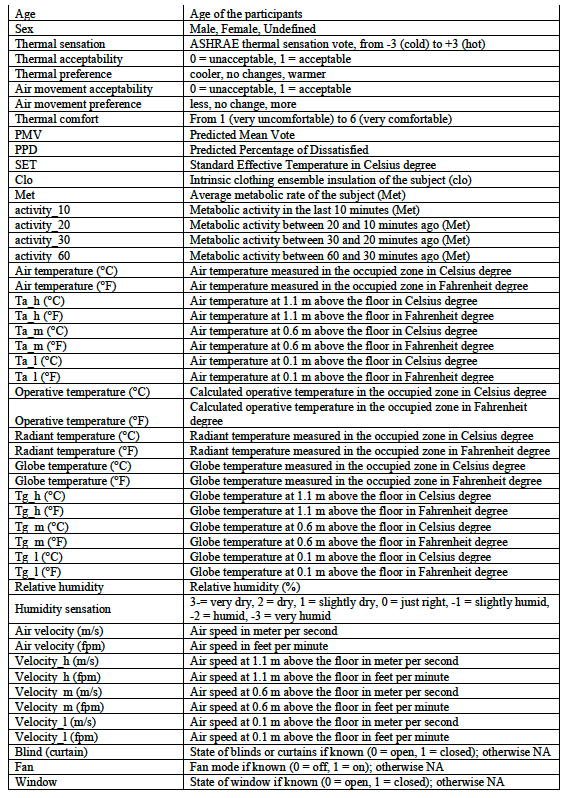
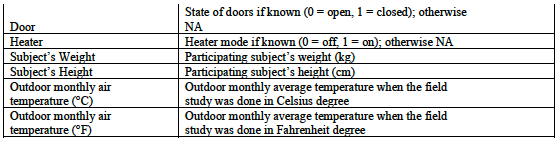

In [117]:
# First few rows
dataset.head()

,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2


In [118]:
# Missing values summary
print("\nMissing values per column:\n", dataset["Thermal preference"].isnull().sum())


Missing values per column:
 22083


In [119]:
dataset.columns

Index(['Publication (Citation)', 'Data contributor', 'Year', 'Season',
       'Koppen climate classification', 'Climate', 'City', 'Country',
       'Building type', 'Cooling startegy_building level',
       'Cooling startegy_operation mode for MM buildings',
       'Heating strategy_building level', 'Age', 'Sex', 'Thermal sensation',
       'Thermal sensation acceptability', 'Thermal preference',
       'Air movement acceptability', 'Air movement preference',
       'Thermal comfort', 'PMV', 'PPD', 'SET', 'Clo', 'Met', 'activity_10',
       'activity_20', 'activity_30', 'activity_60', 'Air temperature (C)',
       'Air temperature (F)', 'Ta_h (C)', 'Ta_h (F)', 'Ta_m (C)', 'Ta_m (F)',
       'Ta_l (C)', 'Ta_l (F)', 'Operative temperature (C)',
       'Operative temperature (F)', 'Radiant temperature (C)',
       'Radiant temperature (F)', 'Globe temperature (C)',
       'Globe temperature (F)', 'Tg_h (C)', 'Tg_h (F)', 'Tg_m (C)', 'Tg_m (F)',
       'Tg_l (C)', 'Tg_l (F)', 'Relative humi

In [120]:
# loc[] is primarily label based filtering method, to access a group of rows and columns by label
df = dataset.loc[:, dataset.isna().mean() < 0.67]

In [121]:
df.columns

Index(['Publication (Citation)', 'Data contributor', 'Year', 'Season',
       'Koppen climate classification', 'Climate', 'City', 'Country',
       'Building type', 'Cooling startegy_building level',
       'Heating strategy_building level', 'Age', 'Sex', 'Thermal sensation',
       'Thermal sensation acceptability', 'Thermal preference',
       'Air movement preference', 'Thermal comfort', 'PMV', 'PPD', 'SET',
       'Clo', 'Met', 'Air temperature (C)', 'Air temperature (F)',
       'Operative temperature (C)', 'Operative temperature (F)', 'Tg_h (C)',
       'Tg_h (F)', 'Relative humidity (%)', 'Air velocity (m/s)',
       'Air velocity (fpm)', 'Outdoor monthly air temperature (C)',
       'Outdoor monthly air temperature (F)', 'Database'],
      dtype='object')

In [122]:
df.isnull().sum()

Publication (Citation)                  1655
Data contributor                           0
Year                                     248
Season                                   241
Koppen climate classification              0
Climate                                    0
City                                      13
Country                                    0
Building type                           4199
Cooling startegy_building level         1227
Heating strategy_building level        69818
Age                                    64004
Sex                                    40548
Thermal sensation                       3129
Thermal sensation acceptability        45139
Thermal preference                     22083
Air movement preference                64208
Thermal comfort                        71248
PMV                                    40849
PPD                                    40849
SET                                    41065
Clo                                     7920
Met       

In [123]:
df.dtypes

Publication (Citation)                  object
Data contributor                        object
Year                                   float64
Season                                  object
Koppen climate classification           object
Climate                                 object
City                                    object
Country                                 object
Building type                           object
Cooling startegy_building level         object
Heating strategy_building level         object
Age                                    float64
Sex                                     object
Thermal sensation                      float64
Thermal sensation acceptability        float64
Thermal preference                      object
Air movement preference                 object
Thermal comfort                         object
PMV                                    float64
PPD                                    float64
SET                                    float64
Clo          

In [124]:
# Step 1: Inspect missing data to identify sparse columns
missing_data_summary = dataset.isnull().sum() / len(dataset) * 100
print("Percentage of missing values:\n", missing_data_summary)

# Step 2: Define columns to drop
columns_to_drop = [
    "Publication (Citation)",  # Metadata
    "Data contributor",  # Metadata
    # "Year",  # May not directly affect thermal comfort
    "Air temperature (F)",  # Duplicate with 'Air temperature (C)'
    # "Relative humidity (%)",  # Example: Keep or drop depending on focus
    "Cooling startegy_operation mode for MM buildings",  # Sparse
    # "Heating strategy_building level",  # Sparse
    "activity_10",
    "activity_20",
    "activity_30",
    "activity_60",  # Sparse
    "PMV",
    "PPD",
    # "SET",
    # "MET",  # Sparse
    "Ta_h (C)",
    "Ta_h (F)",
    "Ta_m (C)",
    "Ta_m (F)",
    "Ta_l (C)",
    "Ta_l (F)",
    # "Operative temperature (C)",
    "Operative temperature (F)",
    "Radiant temperature (C)",
    "Radiant temperature (F)",
    "Globe temperature (F)",
    "Tg_h (C)",
    "Tg_h (F)",
    "Tg_m (C)",
    "Tg_m (F)",
    "Tg_l (C)",
    "Tg_l (F)",
    "Humidity preference",
    "Humidity sensation",
    "Air velocity (fpm)",
    "Velocity_h (m/s)",
    "Velocity_h (fpm)",
    "Velocity_m (m/s)",
    "Velocity_m (fpm)",
    "Velocity_l (m/s)",
    "Velocity_l (fpm)",
    "Blind (curtain)",
    "Fan",
    "Window",
    "Door",
    "Heater",  # Sparse
    "Outdoor monthly air temperature (F)",
    "Database",
    # Sparse
]

# Step 3: Drop the columns
simplified_dataset = dataset.drop(columns=columns_to_drop, errors="ignore")

# Step 4: Save the simplified dataset (optional)
# simplified_dataset.to_csv("/mnt/data/simplified_ashrae_data.csv", index=False)

# Display the updated dataset shape and columns
print("Updated Dataset Shape:", simplified_dataset.shape)
print("Updated Columns:\n", simplified_dataset.columns)

Percentage of missing values:
 Publication (Citation)                  1.538347
Data contributor                        0.000000
Year                                    0.230520
Season                                  0.224013
Koppen climate classification           0.000000
                                         ...    
Door                                   89.654499
Heater                                 92.249705
Outdoor monthly air temperature (C)    26.254148
Outdoor monthly air temperature (F)    26.256007
Database                                0.000000
Length: 70, dtype: float64
Updated Dataset Shape: (107583, 28)
Updated Columns:
 Index(['Year', 'Season', 'Koppen climate classification', 'Climate', 'City',
       'Country', 'Building type', 'Cooling startegy_building level',
       'Heating strategy_building level', 'Age', 'Sex', 'Thermal sensation',
       'Thermal sensation acceptability', 'Thermal preference',
       'Air movement acceptability', 'Air movement preference

In [125]:
# Step 1: Inspect missing data to identify sparse columns
missing_data_summary = simplified_dataset.isnull().sum() / len(dataset) * 100
print("Percentage of missing values:\n", missing_data_summary)

Percentage of missing values:
 Year                                    0.230520
Season                                  0.224013
Koppen climate classification           0.000000
Climate                                 0.000000
City                                    0.012084
Country                                 0.000000
Building type                           3.903033
Cooling startegy_building level         1.140515
Heating strategy_building level        64.896870
Age                                    59.492671
Sex                                    37.689970
Thermal sensation                       2.908452
Thermal sensation acceptability        41.957372
Thermal preference                     20.526477
Air movement acceptability             84.805220
Air movement preference                59.682292
Thermal comfort                        66.226077
SET                                    38.170529
Clo                                     7.361758
Met                                   

### Columns to Consider Dropping:

1. **High Missing Values (>50%):**
   - `Air movement acceptability` (84.81% missing)
   - `Subject«s height (cm)` (81.08% missing)
   - `Subject«s weight (kg)` (77.08% missing)
   - `Globe temperature (C)` (75.83% missing)

2. **Columns with Missing Values Between 20-50% (Optional):**
   - These columns have a moderate level of missing data and can be retained or dropped based on their importance:
     - `Sex` (37.69% missing): Important for personalization but sparse.
     - `Thermal sensation acceptability` (41.96% missing): Consider based on its relevance to thermal comfort.
     - `Thermal preference` (20.53% missing): Useful for comfort analysis but sparse.

3. **Columns with Relatively Lower Missing Data (<20%):**
   - These columns have low percentages of missing values and can be imputed:
     - `Age` (59.49% missing): High but potentially critical for demographic insights. Consider imputing if relevant.
     - `Met` (15.95% missing): Can be imputed with median or mean.
     - `Air velocity (m/s)` (16.44% missing): Critical for air movement and comfort analysis; impute missing values.
     - `Outdoor monthly air temperature (C)` (26.25% missing): Impute to retain climate-related information.
     - `Air temperature (C)` (7.13% missing): Retain and impute missing values, as temperature is a key variable.

---

### Justification for Decisions:

1. **High Missing Values (>50%):**
   - Columns with over 50% missing data are unreliable for analysis and should generally be dropped unless they are critical to the research.

2. **Moderate Missing Values (20-50%):**
   - Columns like `Sex`, `Thermal sensation acceptability`, and `Thermal preference` should be retained only if they are critical to the research objectives. Otherwise, they can be dropped or imputed with caution.

3. **Low Missing Values (<20%):**
   - Columns with low missing values should be imputed to retain their information. Techniques like median, mean, or mode imputation can be used depending on the data type and distribution.

4. **Final Decision:**
   - Drop columns with over 50% missing values and evaluate the significance of columns with 20-50% missing data. Impute missing values for columns with less than 20% missing data to maintain their utility in analysis.


In [126]:
# Define columns to drop based on missing values and relevance
columns_to_drop_further = [
    "Air movement acceptability",  # >80% missing
    # "Thermal comfort",  # >66% missing
    # "Subject«s height (cm)",  # >81% missing
    # "Subject«s weight (kg)",  # >77% missing
    "Globe temperature (C)",  # >75% missing
]

# Drop the additional columns
simplified_dataset = simplified_dataset.drop(
    columns=columns_to_drop_further, errors="ignore"
)

# Save the updated simplified dataset
# simplified_dataset.to_csv("/mnt/data/further_simplified_ashrae_data.csv", index=False)

# Check the updated dataset shape and columns
print("Updated Dataset Shape:", simplified_dataset.shape)
print("Updated Columns:\n", simplified_dataset.columns)

Updated Dataset Shape: (107583, 26)
Updated Columns:
 Index(['Year', 'Season', 'Koppen climate classification', 'Climate', 'City',
       'Country', 'Building type', 'Cooling startegy_building level',
       'Heating strategy_building level', 'Age', 'Sex', 'Thermal sensation',
       'Thermal sensation acceptability', 'Thermal preference',
       'Air movement preference', 'Thermal comfort', 'SET', 'Clo', 'Met',
       'Air temperature (C)', 'Operative temperature (C)',
       'Relative humidity (%)', 'Air velocity (m/s)', 'Subject«s height (cm)',
       'Subject«s weight (kg)', 'Outdoor monthly air temperature (C)'],
      dtype='object')


In [127]:
# Statistical summary of numerical features
print("\nStatistical Summary:\n", simplified_dataset.describe())


Statistical Summary:
                 Year           Age  Thermal sensation  \
count  107335.000000  43579.000000      104454.000000   
mean     2002.010695     32.560173           0.167892   
std         8.821613     14.094305           1.241041   
min      1979.000000      6.000000          -3.000000   
25%      1995.000000     21.000000          -0.500000   
50%      1999.000000     29.000000           0.000000   
75%      2011.000000     43.000000           1.000000   
max      2016.000000     99.000000           3.000000   

       Thermal sensation acceptability           SET           Clo  \
count                     62444.000000  66518.000000  99663.000000   
mean                          0.775078     25.769629      0.673669   
std                           0.417534      3.201344      0.287622   
min                           0.000000      6.550000      0.000000   
25%                           1.000000     23.710000      0.490000   
50%                           1.000000     

In [128]:
simplified_dataset.isnull().sum()

Year                                     248
Season                                   241
Koppen climate classification              0
Climate                                    0
City                                      13
Country                                    0
Building type                           4199
Cooling startegy_building level         1227
Heating strategy_building level        69818
Age                                    64004
Sex                                    40548
Thermal sensation                       3129
Thermal sensation acceptability        45139
Thermal preference                     22083
Air movement preference                64208
Thermal comfort                        71248
SET                                    41065
Clo                                     7920
Met                                    17164
Air temperature (C)                     7672
Operative temperature (C)              69620
Relative humidity (%)                   9821
Air veloci

In [129]:
# Define a dictionary with the current column names as keys and new names as values
rename_columns = {
    "Year": "year",
    "Season": "season",
    "Koppen climate classification": "koppen_climate",
    "Climate": "climate_description",
    "City": "city",
    "Country": "country",
    "Building type": "building_type",
    "Cooling startegy_building level": "cooling_strategy",
    "Heating strategy_building level": "heating_strategy",
    "Age": "age",
    "Sex": "sex",
    "Thermal sensation": "thermal_sensation",
    "Thermal sensation acceptability": "thermal_sensation_acceptability",
    "Thermal preference": "thermal_preference",
    "Air movement preference": "air_movement_preference",
    "Thermal comfort": "thermal_comfort",
    "SET": "standard_effective_temperature",
    "Clo": "clothing_insulation",
    "Met": "metabolic_rate",
    "Air temperature (C)": "air_temperature",
    "Operative temperature (C)": "operative_temperature",
    "Radiant temperature (C)": "radiant_temperature",
    "Relative humidity (%)": "relative_humidity",
    "Humidity preference": "humidity_preference",
    "Humidity sensation": "humidity_sensation",
    "Subject«s height (cm)": "subject_height",
    "Subject«s weight (kg)": "subject_weight",
    "Air velocity (m/s)": "air_velocity",
    "Outdoor monthly air temperature (C)": "outdoor_air_temperature",
}

# Rename the columns
simplified_dataset.rename(columns=rename_columns, inplace=True)

# Display the updated column names
print("Updated Column Names:\n", simplified_dataset.columns)

Updated Column Names:
 Index(['year', 'season', 'koppen_climate', 'climate_description', 'city',
       'country', 'building_type', 'cooling_strategy', 'heating_strategy',
       'age', 'sex', 'thermal_sensation', 'thermal_sensation_acceptability',
       'thermal_preference', 'air_movement_preference', 'thermal_comfort',
       'standard_effective_temperature', 'clothing_insulation',
       'metabolic_rate', 'air_temperature', 'operative_temperature',
       'relative_humidity', 'air_velocity', 'subject_height', 'subject_weight',
       'outdoor_air_temperature'],
      dtype='object')


In [130]:
# Export the sampled dataframe to a CSV file
simplified_dataset.to_csv("simplified_ashrae_data.csv", index=False)

In [131]:
# Display basic information about the dataset
print("Dataset shape:", simplified_dataset.shape)
print("\nColumns:\n", simplified_dataset.columns)
print("\nSample rows:\n", simplified_dataset.head())

Dataset shape: (107583, 26)

Columns:
 Index(['year', 'season', 'koppen_climate', 'climate_description', 'city',
       'country', 'building_type', 'cooling_strategy', 'heating_strategy',
       'age', 'sex', 'thermal_sensation', 'thermal_sensation_acceptability',
       'thermal_preference', 'air_movement_preference', 'thermal_comfort',
       'standard_effective_temperature', 'clothing_insulation',
       'metabolic_rate', 'air_temperature', 'operative_temperature',
       'relative_humidity', 'air_velocity', 'subject_height', 'subject_weight',
       'outdoor_air_temperature'],
      dtype='object')

Sample rows:
      year  season koppen_climate climate_description   city country  \
0  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
1  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
2  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
3  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
4  2000.0  Summer   

In [132]:
# Identify categorical columns
categorical_cols = simplified_dataset.select_dtypes(include=["object"]).columns

# Display unique values and their count for each categorical column
for col in categorical_cols:
    unique_values = simplified_dataset[col].unique()
    print(f"Column: '{col}'")
    print(f"Number of Unique Values: {len(unique_values)}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: 'season'
Number of Unique Values: 5
Unique Values: ['Summer' 'Autumn' 'Winter' 'Spring' nan]
--------------------------------------------------
Column: 'koppen_climate'
Number of Unique Values: 16
Unique Values: ['Cfa' 'Csb' 'Aw' 'BSh' 'Csa' 'Csc' 'Dwa' 'Af' 'Cfb' 'BWh' 'BSk' 'Am' 'As'
 'Cwa' 'Cwb' 'Dfb']
--------------------------------------------------
Column: 'climate_description'
Number of Unique Values: 19
Unique Values: ['Humid subtropical' 'Warm-summer Mediterranean' 'Tropical wet savanna'
 'Hot semi-arid' 'Hot-summer Mediterranean' 'Cool-summer Mediterranean'
 'Monsoon-influenced hot-summer humid continental' 'Tropical rainforest'
 'Temperate oceanic' 'Hot desert' 'Cold semi-arid' 'Tropical monsoon'
 'Tropical dry savanna' 'Monsoon-influenced humid subtropical'
 'Subtropical highland' 'Warm-summer humid continental'
 'Cool-summer mediterranean' 'Oceanic' 'Hot-summer mediterranean']
--------------------------------------------------
Column: 'city'
Number of Unique Value


Percentage of Missing Values:
 year                                0.230520
season                              0.224013
koppen_climate                      0.000000
climate_description                 0.000000
city                                0.012084
country                             0.000000
building_type                       3.903033
cooling_strategy                    1.140515
heating_strategy                   64.896870
age                                59.492671
sex                                37.689970
thermal_sensation                   2.908452
thermal_sensation_acceptability    41.957372
thermal_preference                 20.526477
air_movement_preference            59.682292
thermal_comfort                    66.226077
standard_effective_temperature     38.170529
clothing_insulation                 7.361758
metabolic_rate                     15.954194
air_temperature                     7.131238
operative_temperature              64.712826
relative_humidity      

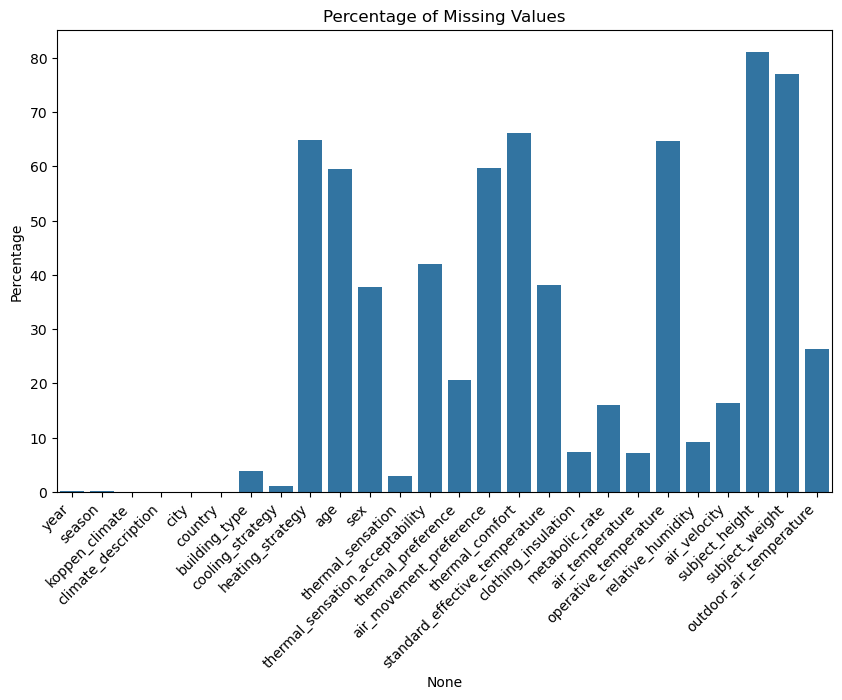

In [133]:
# Calculate percentage of missing values
missing_values = simplified_dataset.isnull().mean() * 100
print("\nPercentage of Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=45, ha="right")
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

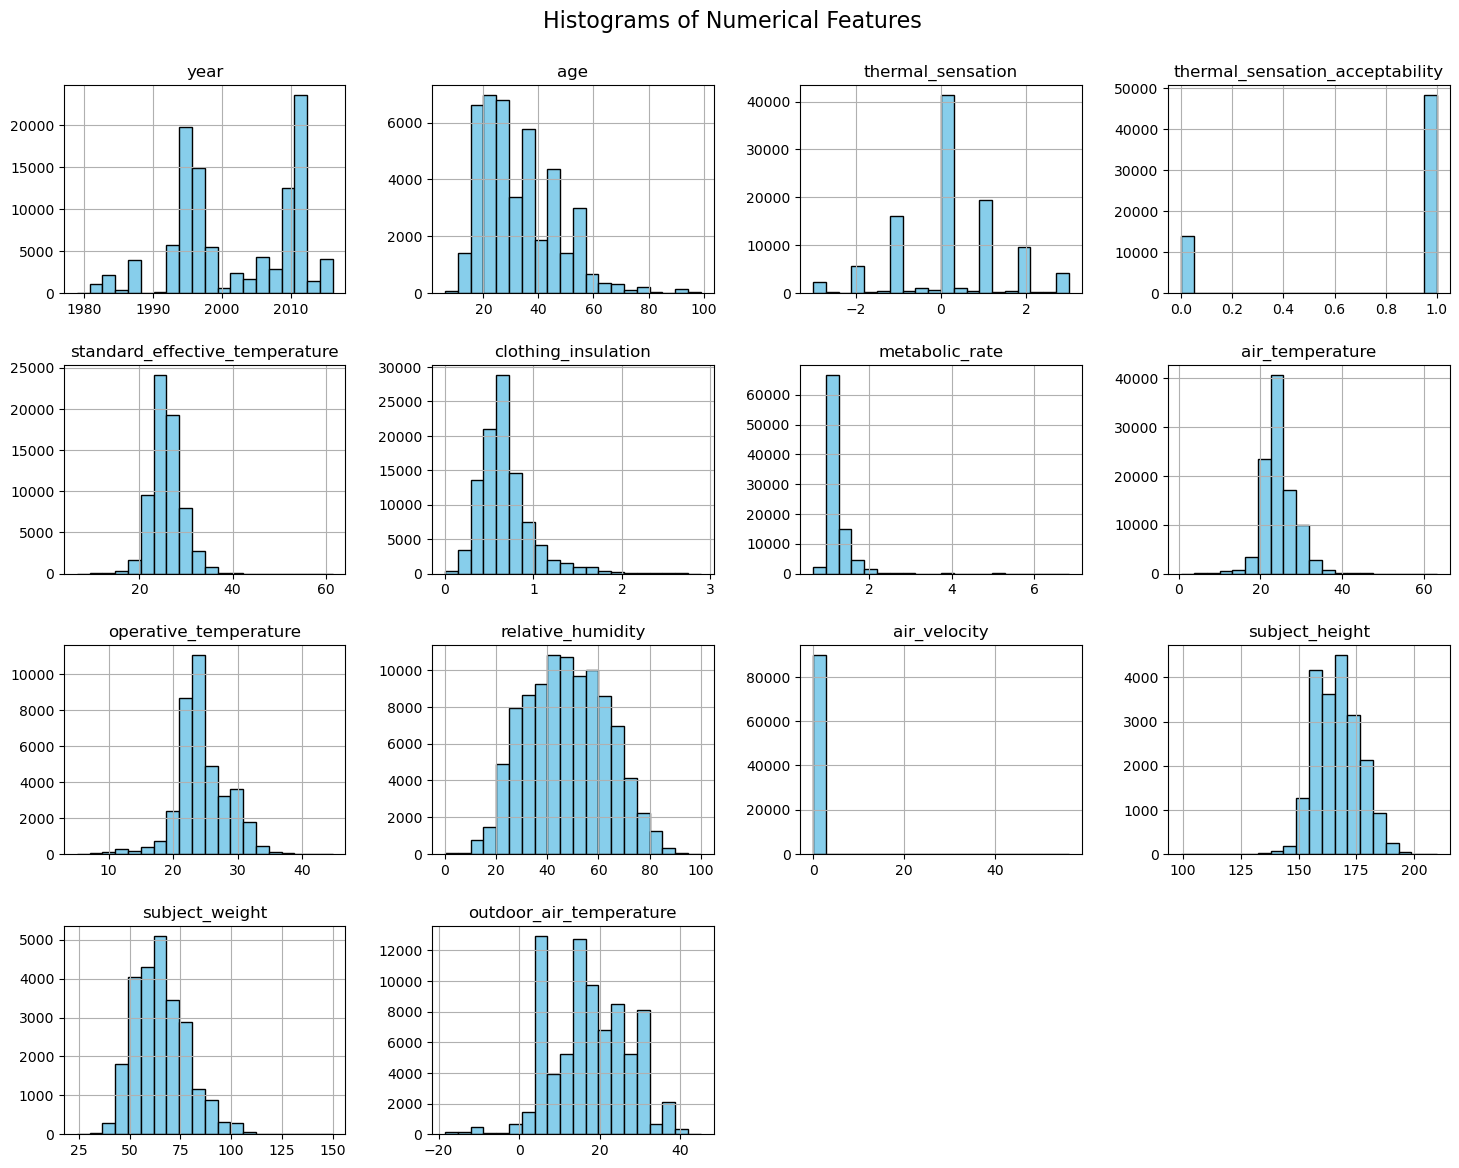

In [134]:
# Plot histograms for numerical features
simplified_dataset.select_dtypes(include=["float64"]).hist(
    figsize=(15, 12), bins=20, color="skyblue", edgecolor="black"
)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

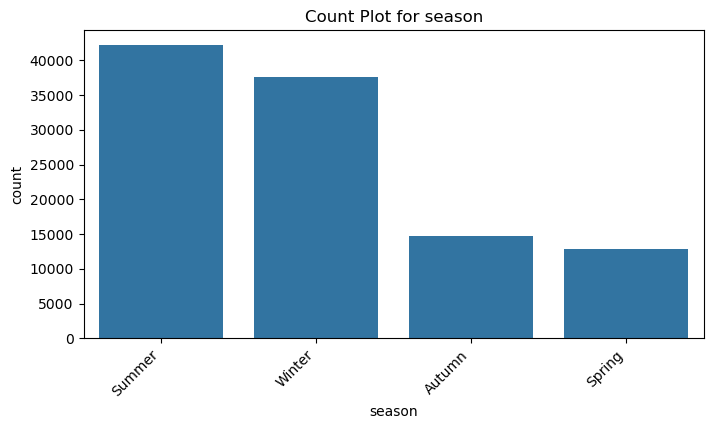

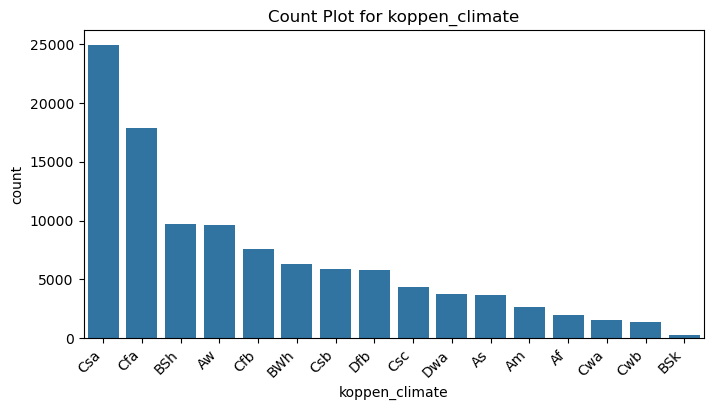

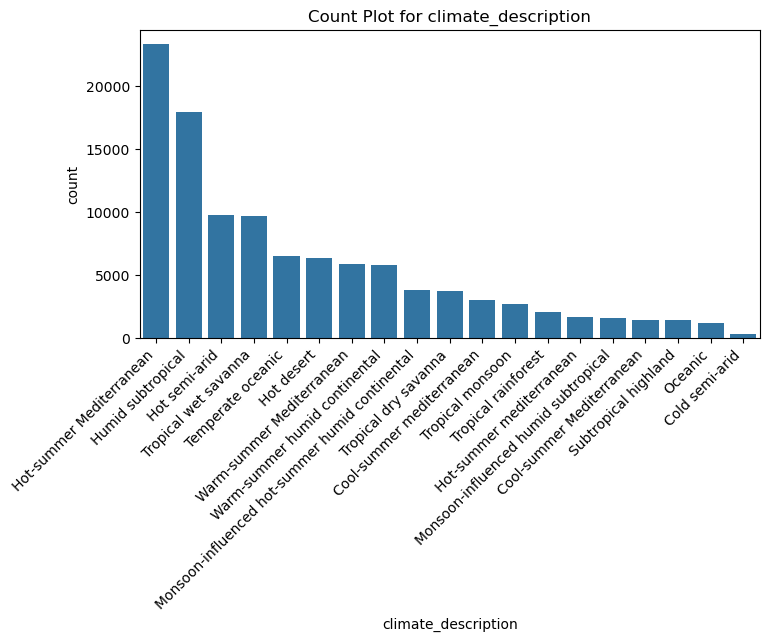

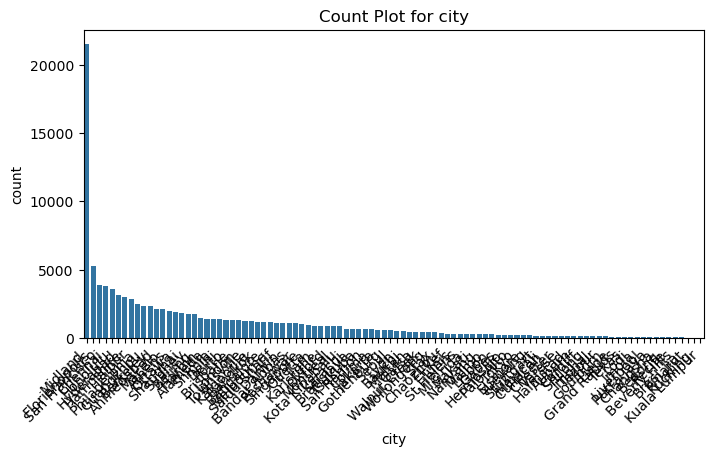

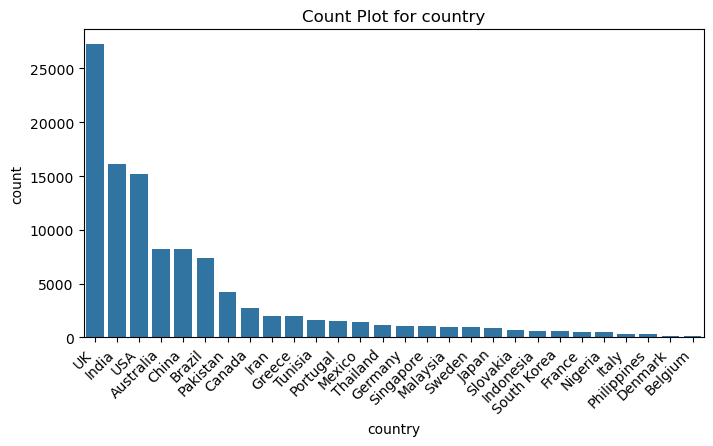

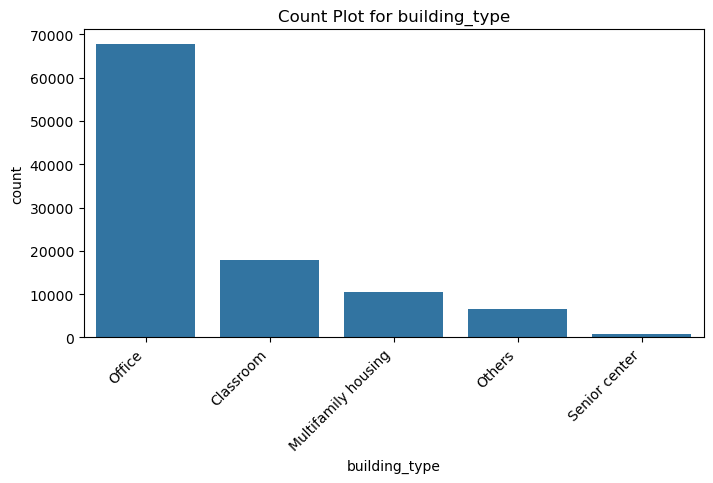

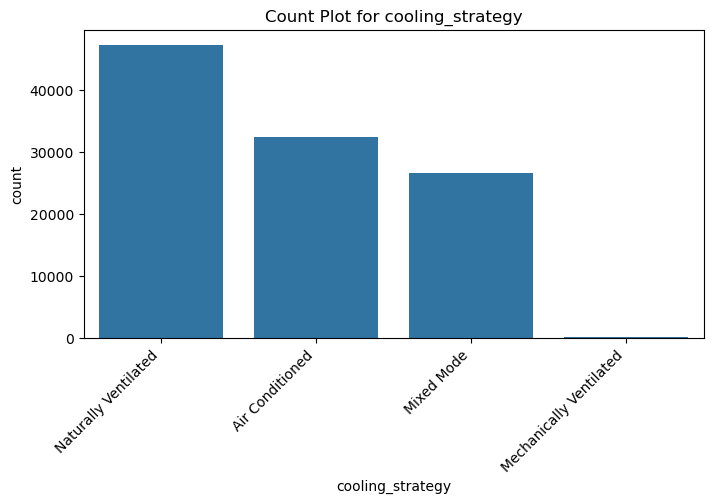

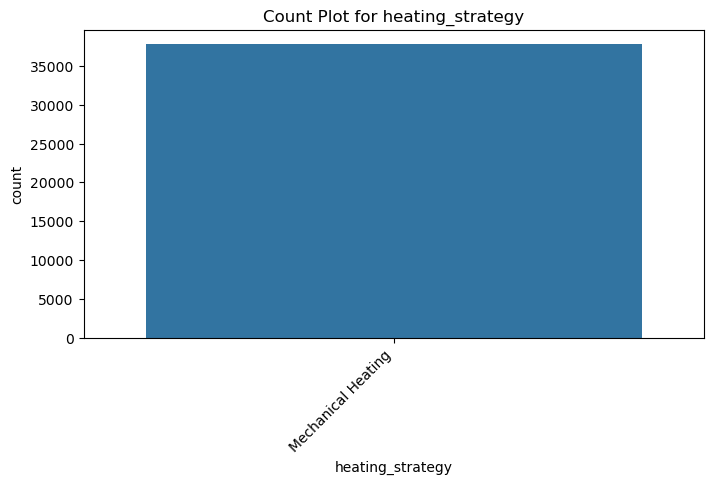

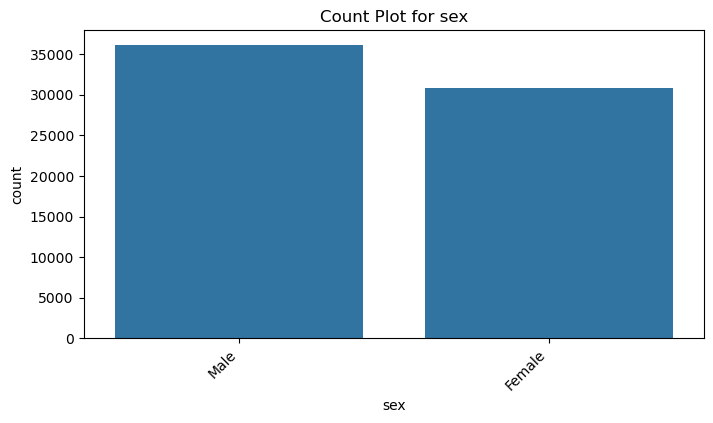

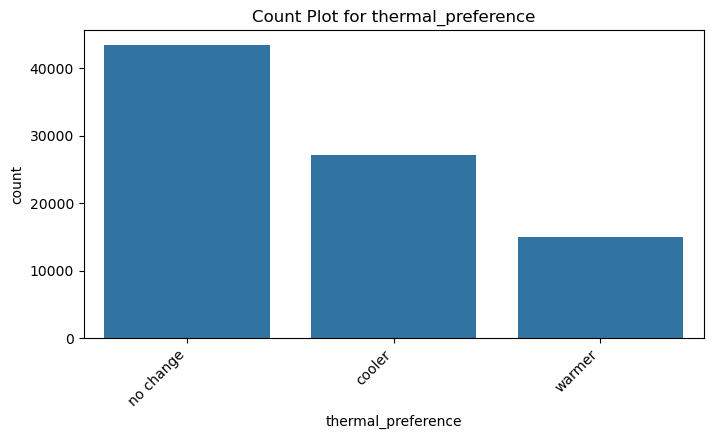

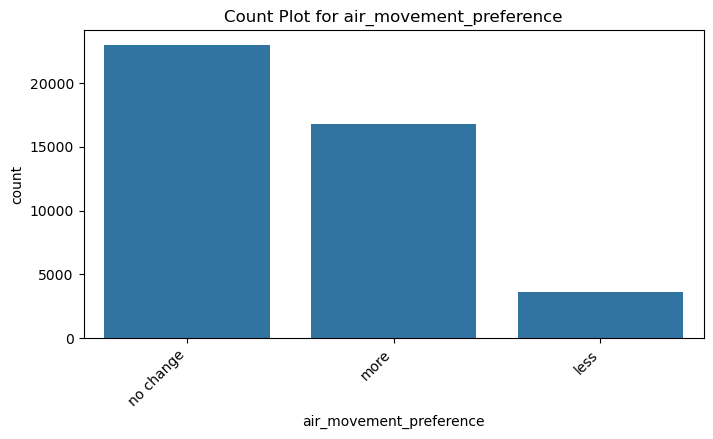

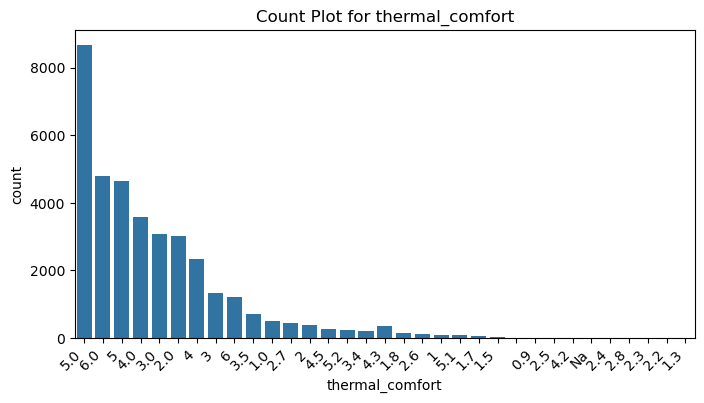

In [135]:
# Extract categorical columns
categorical_cols = simplified_dataset.select_dtypes(include=["object"]).columns.tolist()

# Generate count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(
        data=simplified_dataset,
        x=col,
        order=simplified_dataset[col].value_counts().index,
    )
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45, ha="right")
    plt.show()

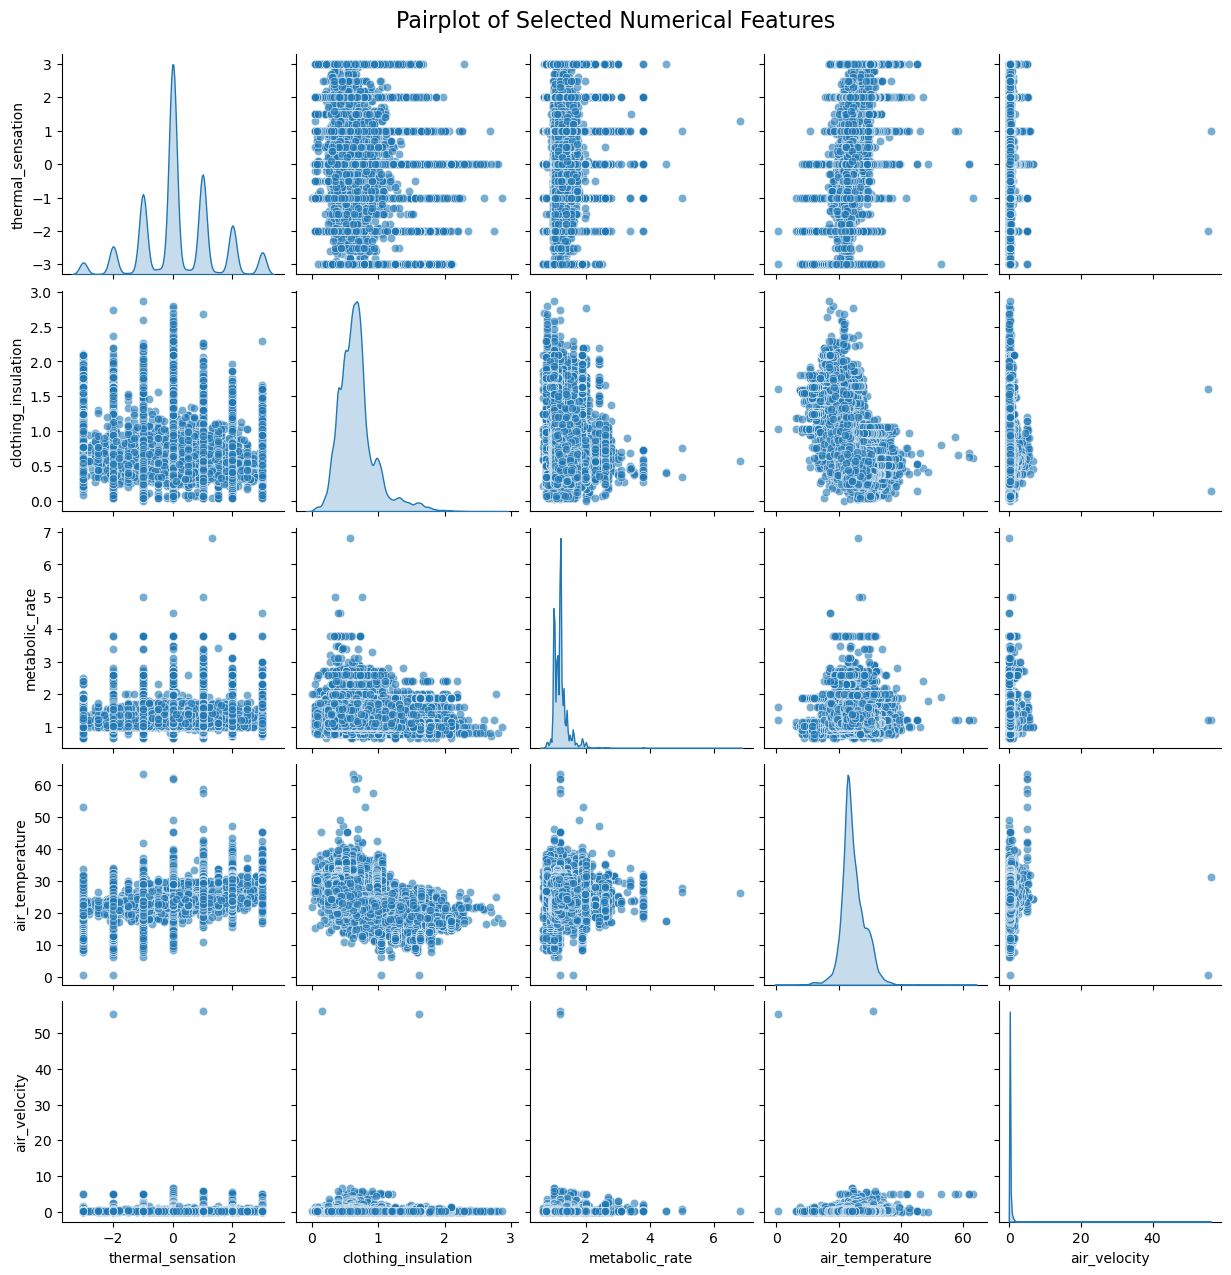

In [136]:
# Pairplot for selected numerical features
numerical_cols = [
    "thermal_sensation",
    "clothing_insulation",
    "metabolic_rate",
    "air_temperature",
    "air_velocity",
]
sns.pairplot(
    simplified_dataset[numerical_cols].dropna(),
    diag_kind="kde",
    plot_kws={"alpha": 0.6},
)
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02, fontsize=16)
plt.show()

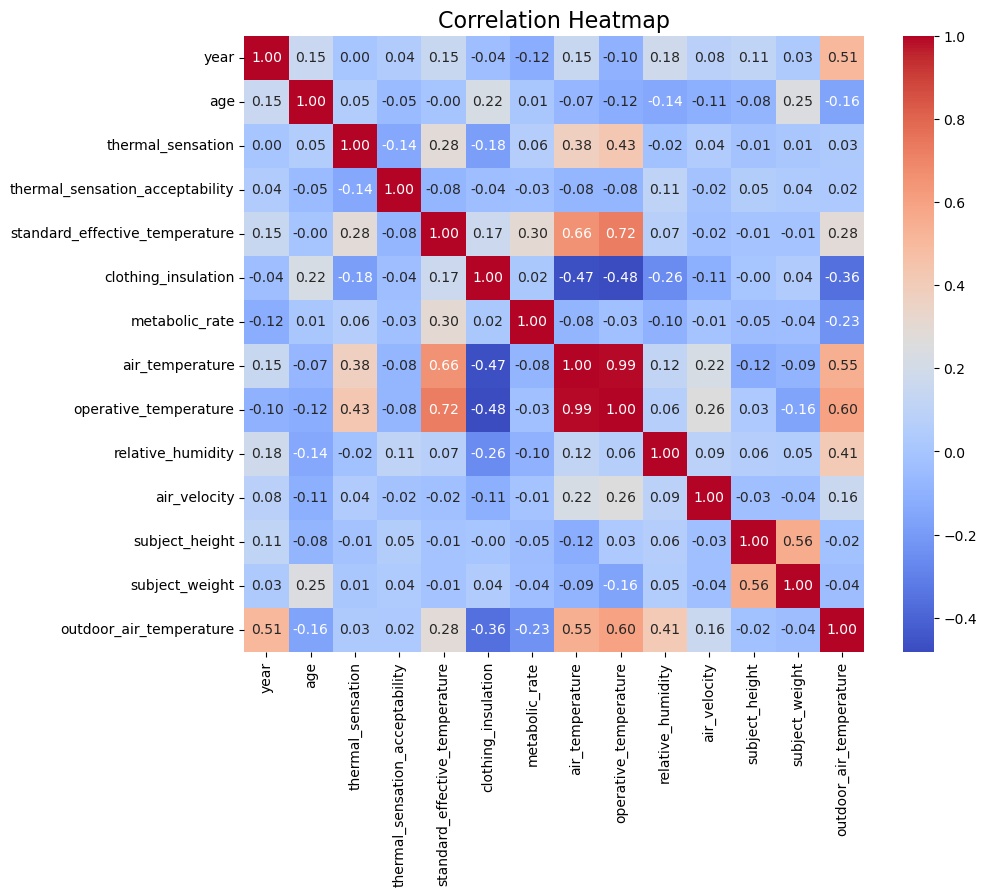

In [137]:
# Select only numerical columns
numerical_cols = simplified_dataset.select_dtypes(include=["float64", "int64"])

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

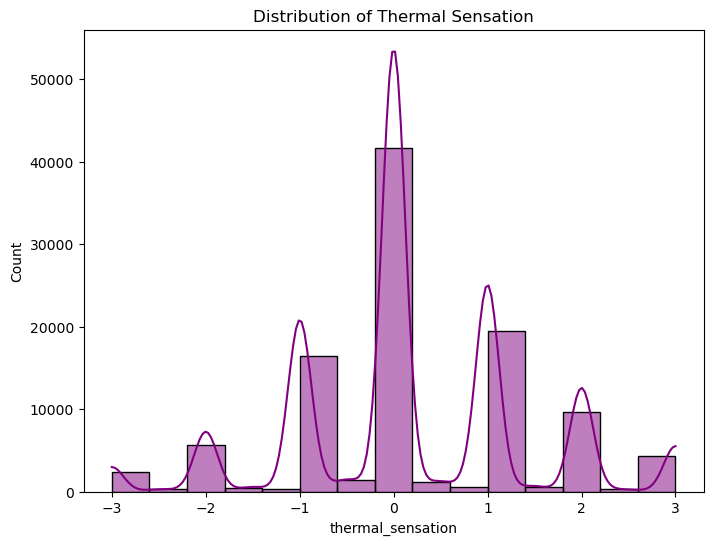

In [138]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=simplified_dataset, x="thermal_sensation", kde=True, bins=15, color="purple"
)
plt.title("Distribution of Thermal Sensation")
plt.show()

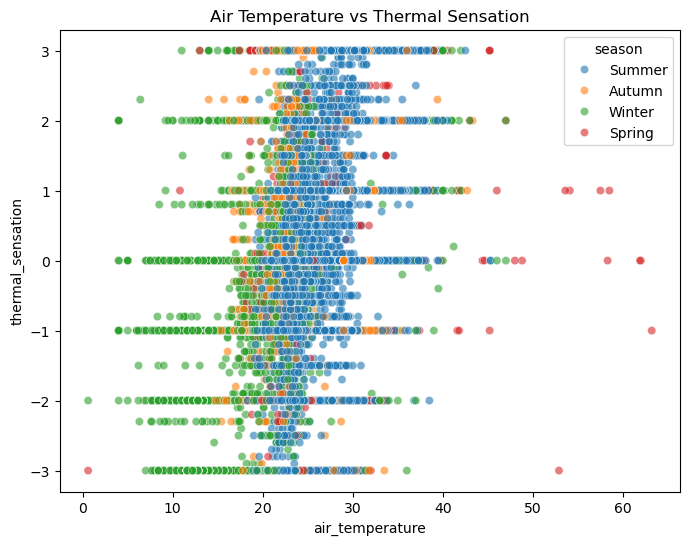

In [139]:
# Scatter plot for key relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=simplified_dataset,
    x="air_temperature",
    y="thermal_sensation",
    hue="season",
    alpha=0.6,
)
plt.title("Air Temperature vs Thermal Sensation")
plt.show()

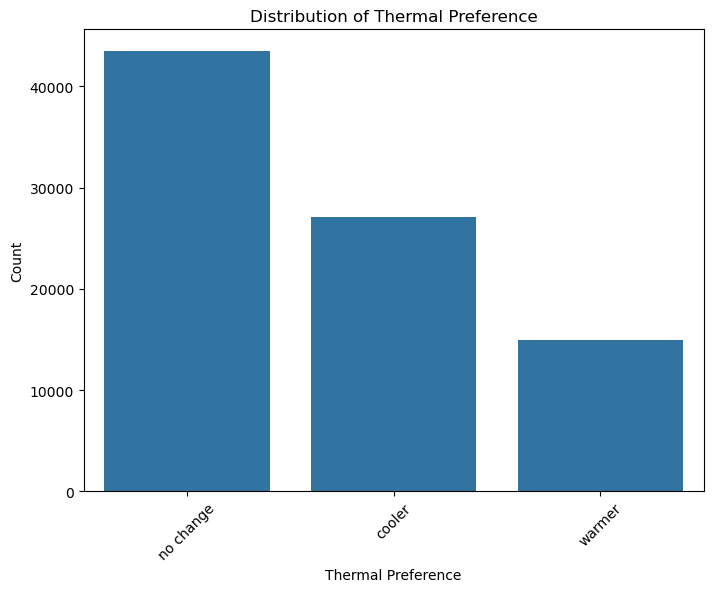

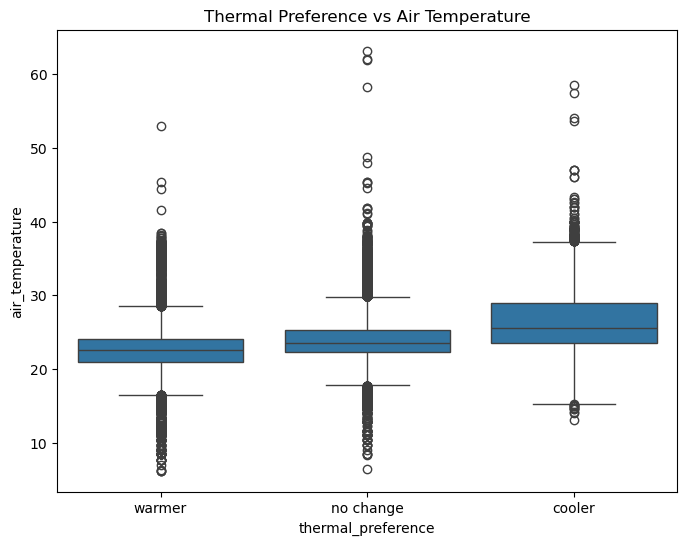

In [140]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(
    data=simplified_dataset,
    x="thermal_preference",
    order=simplified_dataset["thermal_preference"].value_counts().index,
)
plt.title("Distribution of Thermal Preference")
plt.ylabel("Count")
plt.xlabel("Thermal Preference")
plt.xticks(rotation=45)
plt.show()

# Analyze target relationships with key predictors
plt.figure(figsize=(8, 6))
sns.boxplot(data=simplified_dataset, x="thermal_preference", y="air_temperature")
plt.title("Thermal Preference vs Air Temperature")
plt.show()

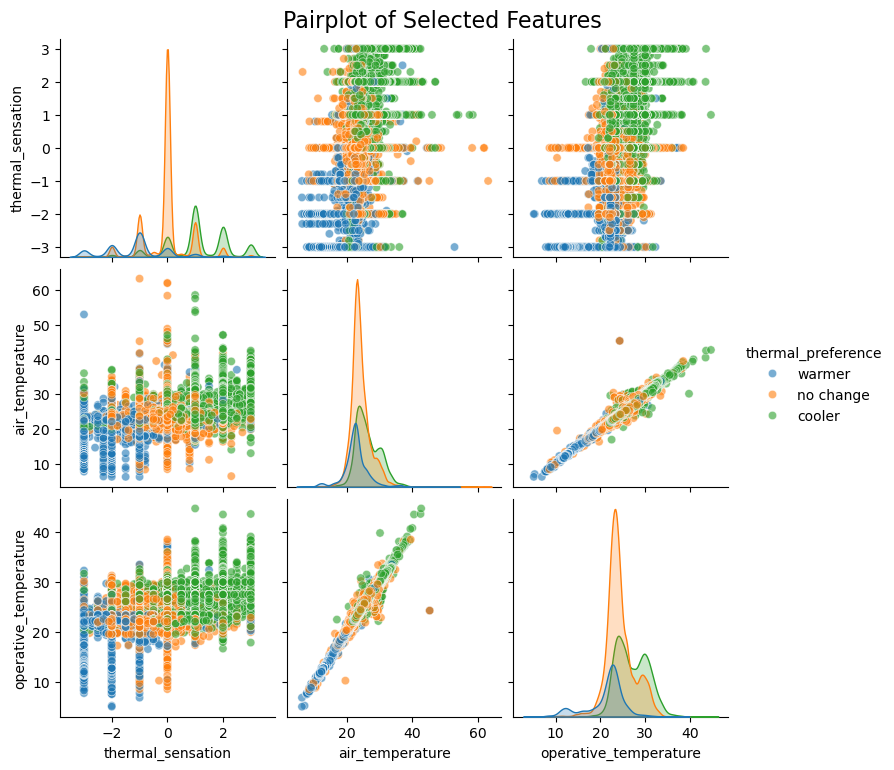

In [142]:
# Pairplot for selected features
selected_features = [
    "thermal_sensation",
    "air_temperature",
    "operative_temperature",
    # "humidity_sensation",
    "thermal_preference",
]
sns.pairplot(
    simplified_dataset[selected_features],
    hue="thermal_preference",
    diag_kind="kde",
    plot_kws={"alpha": 0.6},
)
plt.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.show()

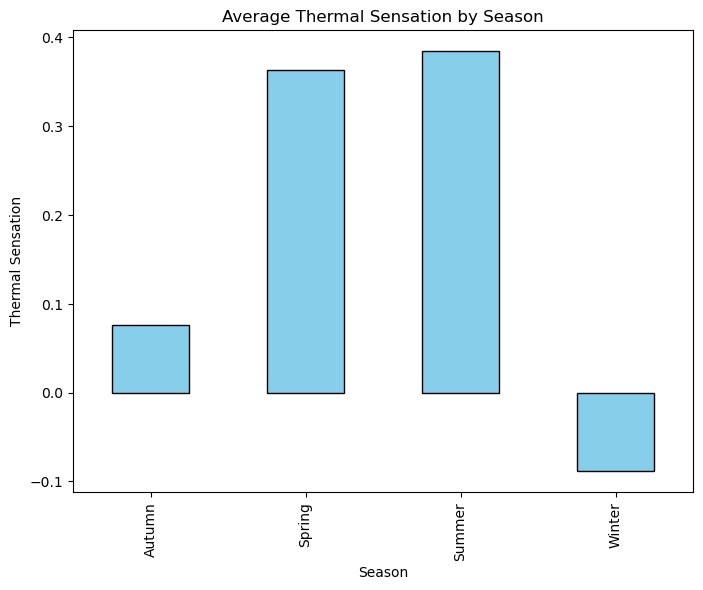

In [ ]:
# Group by season to analyze trends
seasonal_means = simplified_dataset.groupby("season")["thermal_sensation"].mean()
seasonal_means.plot(kind="bar", figsize=(8, 6), color="skyblue", edgecolor="black")
plt.title("Average Thermal Sensation by Season")
plt.ylabel("Thermal Sensation")
plt.xlabel("Season")
plt.show()

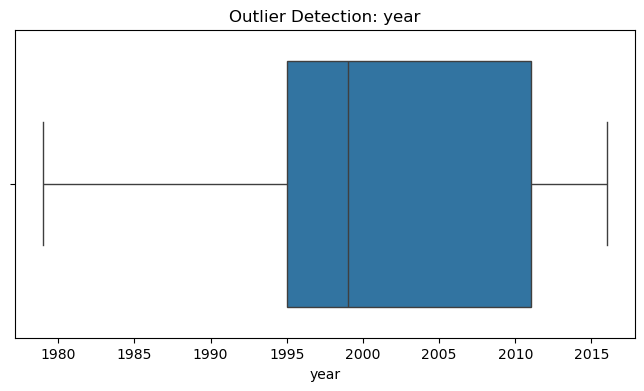

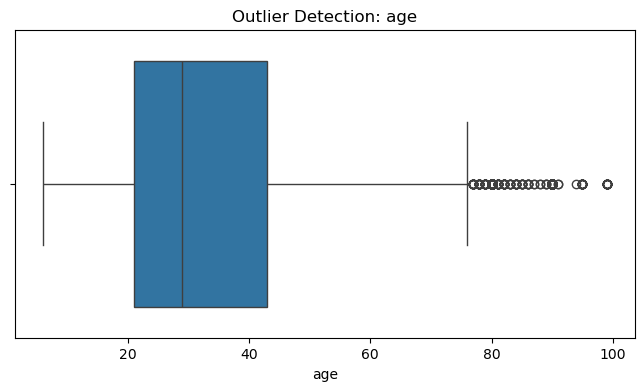

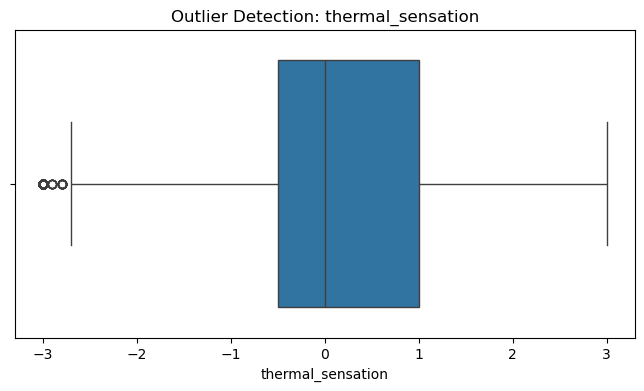

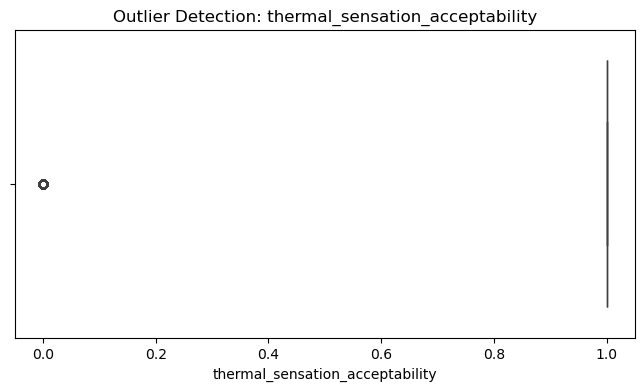

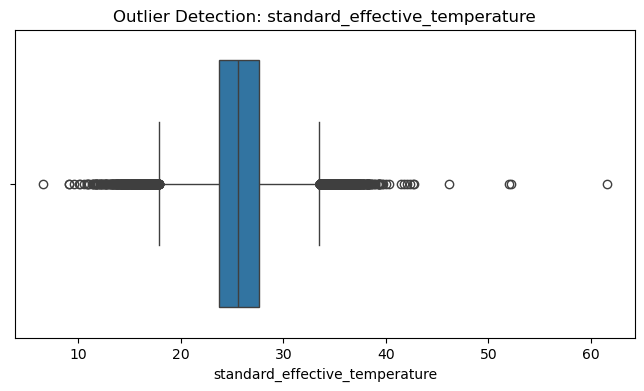

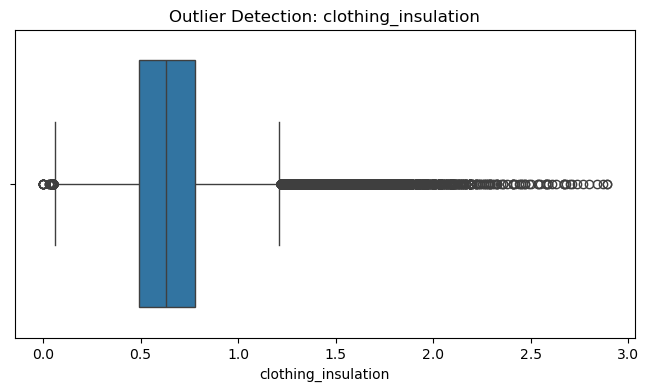

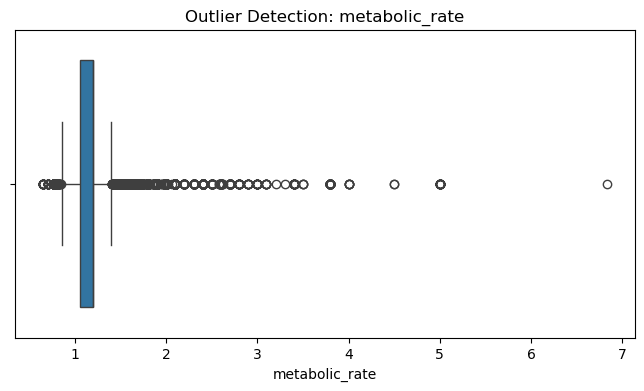

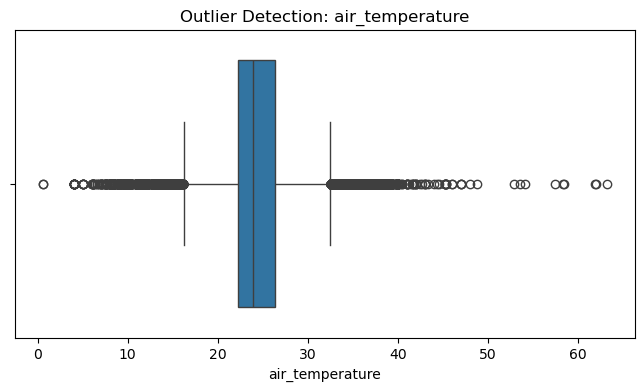

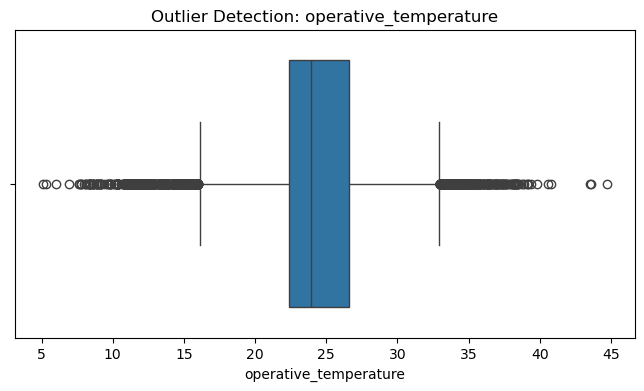

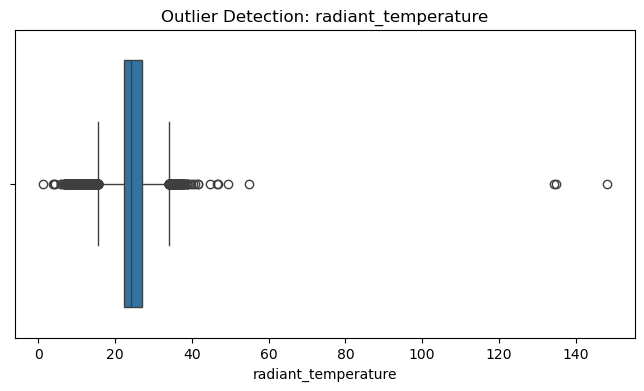

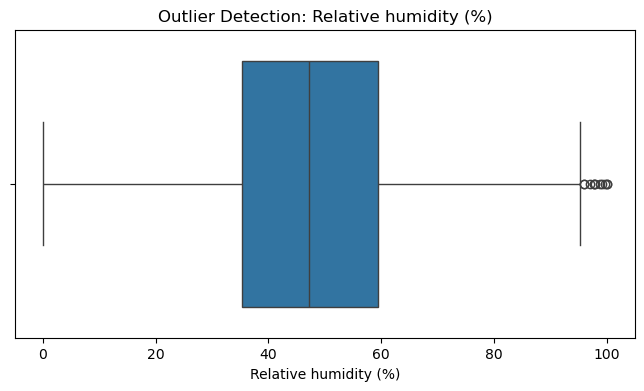

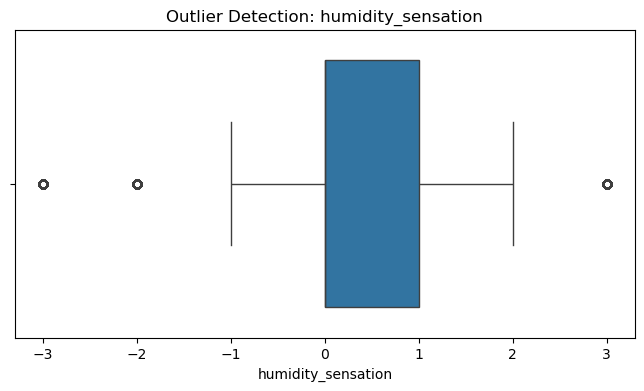

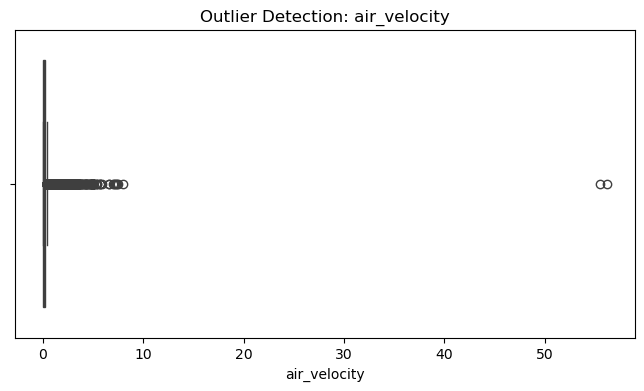

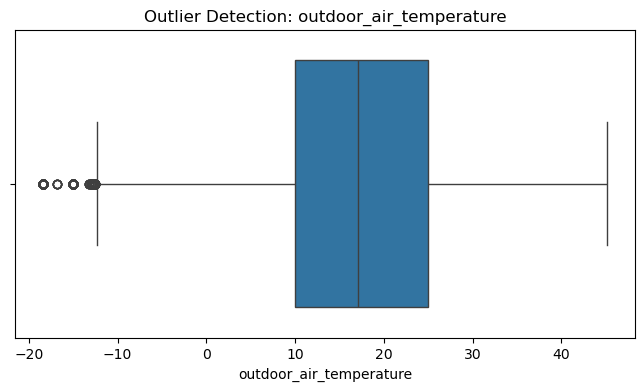

In [ ]:
# Boxplot for detecting outliers in numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=simplified_dataset, x=col)
    plt.title(f"Outlier Detection: {col}")
    plt.show()